## Import libraries 

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the file

In [91]:
df = pd.read_csv('../data/5000topsongs.csv')

In [92]:
df.head()

,id,title,artist,release_date,genres,user_score,rating_count,album_link
0,1,To Pimp a Butterfly,Kendrick Lamar,"March 15, 2015","Conscious Hip Hop, Jazz Rap, West Coast Hip Hop",95,"28,594 ratings",https://www.albumoftheyear.org/album/29250-ken...
1,2,"good kid, m.A.A.d city",Kendrick Lamar,"October 22, 2012","Conscious Hip Hop, West Coast Hip Hop",94,"22,283 ratings",https://www.albumoftheyear.org/album/3840-kend...
2,3,In Rainbows,Radiohead,"October 10, 2007","Art Rock, Alternative Rock",94,"19,366 ratings",https://www.albumoftheyear.org/album/363-radio...
3,4,Songs in the Key of Life,Stevie Wonder,"September 28, 1976","Soul, Progressive Soul",94,"5,952 ratings",https://www.albumoftheyear.org/album/5600-stev...
4,5,OK Computer,Radiohead,"May 21, 1997","Alternative Rock, Art Rock",94,"21,163 ratings",https://www.albumoftheyear.org/album/362-radio...


## Descriptive Statistics

In [93]:
df.describe()

,id,user_score
count,5000.000000,5000.000000
mean,2500.500000,80.249200
std,1443.520003,3.665977
min,1.000000,75.000000
25%,1250.750000,77.000000
50%,2500.500000,80.000000
75%,3750.250000,82.000000
max,5000.000000,95.000000


In [94]:
df.isna().sum()

id              0
title           0
artist          0
release_date    0
genres          0
user_score      0
rating_count    0
album_link      0
dtype: int64

In [95]:
df.nunique()

id              5000
title           4944
artist          2455
release_date    3240
genres          2871
user_score        21
rating_count    1936
album_link      5000
dtype: int64

In [96]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            5000 non-null   int64 
 1   title         5000 non-null   object
 2   artist        5000 non-null   object
 3   release_date  5000 non-null   object
 4   genres        5000 non-null   object
 5   user_score    5000 non-null   int64 
 6   rating_count  5000 non-null   object
 7   album_link    5000 non-null   object
dtypes: int64(2), object(6)
memory usage: 312.6+ KB


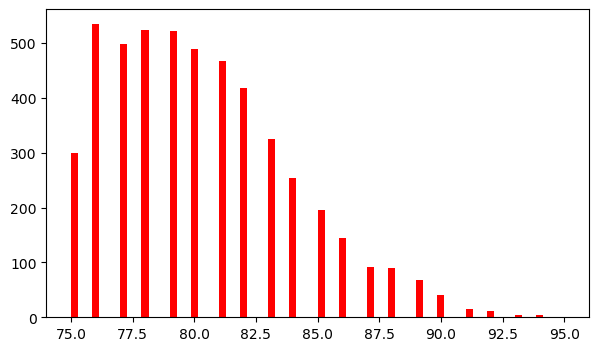

In [97]:
plt.figure(figsize=(7,4))
plt.hist(df['user_score'],bins=70,color='r')
plt.show()

### Converting rating count to an integer 

In [98]:
df['rating_count'] = df['rating_count'].str.replace('ratings','',regex=False)

In [99]:
df['rating_count'] = df['rating_count'].str.replace(',','',regex=True)

In [100]:
df['rating_count'] = df['rating_count'].astype(int)

Extracting year from date

In [101]:
df['release_date'] = pd.to_datetime(df['release_date'], errors = 'coerce')


In [102]:
df['year'] = df['release_date'].dt.year
df['month'] = df['release_date'].dt.month

Outlier

C:\Users\cathy\AppData\Local\Temp\ipykernel_31212\1793866874.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='user_score',y='rating_count',data=df,palette='viridis')


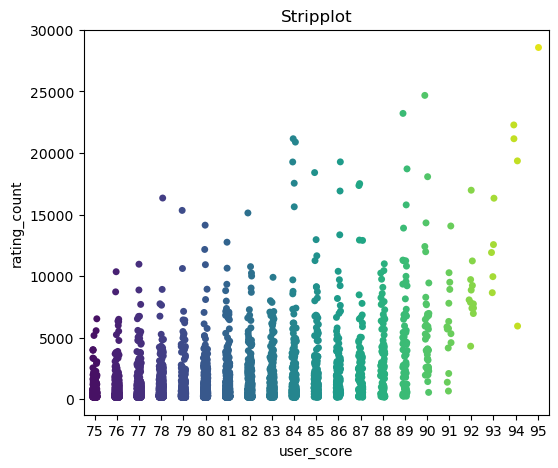

In [121]:
plt.figure(figsize=(6,5))
sns.stripplot(x='user_score',y='rating_count',data=df,palette='viridis')
plt.title('Stripplot')
plt.show()

## Grouping by year and userscore

In [104]:
mean_user_score = df.groupby(['year'])['user_score'].mean().reset_index().sort_values(by = ['user_score'], ascending = False)

In [105]:
mean_user_score

,year,user_score
6,1961.0,84.000000
4,1959.0,83.285714
16,1971.0,83.153846
10,1965.0,82.785714
42,1997.0,82.647887
...,...,...
3,1958.0,78.250000
68,2023.0,78.209184
69,2024.0,78.125628
0,1955.0,77.500000


## Genre

In [106]:
genres = df['genres'].value_counts().head(10).reset_index()
genres

,genres,count
0,Indie Rock,57
1,"Singer-Songwriter, Contemporary Folk",35
2,Pop Rock,26
3,"Indie Folk, Singer-Songwriter",25
4,Alternative Rock,25
5,Post-Rock,24
6,Art Pop,24
7,Progressive Rock,22
8,Neo-Soul,21
9,Hard Bop,20


In [107]:
top_genre = genres['genres'].to_list()

In [108]:
top_genre

['Indie Rock',
 'Singer-Songwriter, Contemporary Folk',
 'Pop Rock',
 'Indie Folk, Singer-Songwriter',
 'Alternative Rock',
 'Post-Rock',
 'Art Pop',
 'Progressive Rock',
 'Neo-Soul',
 'Hard Bop']

In [109]:
genre_score = df[df['genres'].isin(top_genre)].groupby(['genres'])['user_score'].mean().reset_index().sort_values(by = ['user_score'],ascending = False)
genre_score

,genres,user_score
2,Hard Bop,81.950000
7,Post-Rock,81.833333
9,"Singer-Songwriter, Contemporary Folk",81.285714
3,"Indie Folk, Singer-Songwriter",80.920000
6,Pop Rock,80.153846
8,Progressive Rock,79.909091
5,Neo-Soul,79.571429
4,Indie Rock,79.561404
1,Art Pop,79.416667
0,Alternative Rock,79.000000


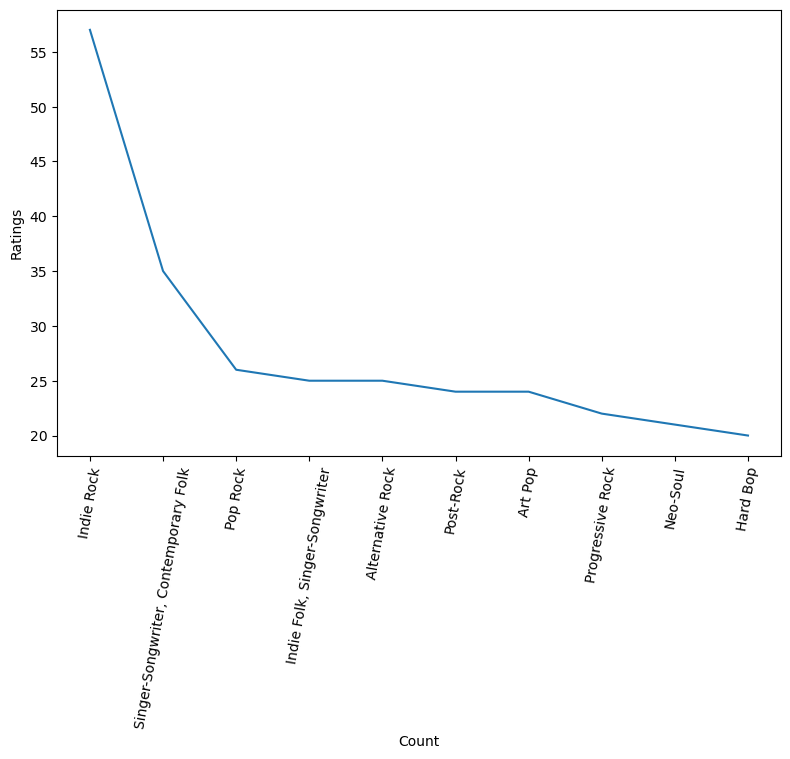

In [110]:
plt.figure(figsize=(8,5))
plt.plot(genres['genres'],genres['count'])
plt.tight_layout()
plt.xlabel('Count')
plt.ylabel('Ratings')
plt.xticks(rotation=80)
plt.show()

User Score

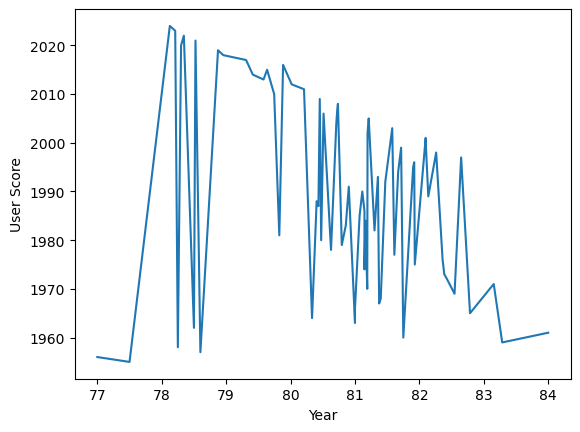

In [111]:
plt.plot(mean_user_score['user_score'],mean_user_score['year'])
plt.xlabel('Year')
plt.ylabel('User Score')
plt.show()

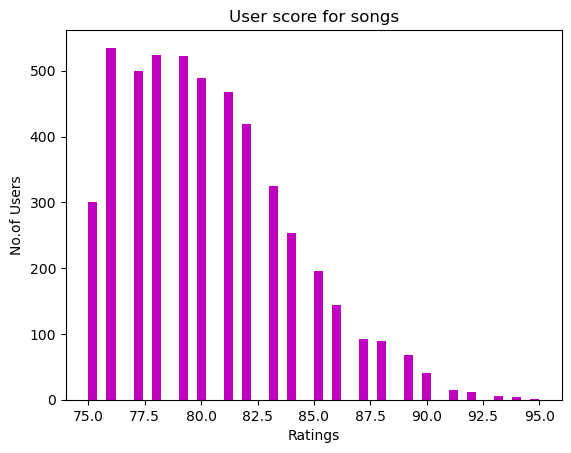

In [112]:
plt.hist(df['user_score'],bins=50,color='m')
plt.title('User score for songs')
plt.xlabel('Ratings')
plt.ylabel('No.of Users')
plt.show()

## Artist Count

In [113]:
artist_count = df['artist'].value_counts().reset_index().head(10)
artist_count

,artist,count
0,King Gizzard & The Lizard Wizard,15
1,Miles Davis,14
2,David Bowie,14
3,Tom Waits,14
4,Bob Dylan,13
5,Swans,11
6,The Beatles,10
7,R.E.M.,10
8,Xiu Xiu,10
9,Aphex Twin,10


In [114]:
year = df['release_date']

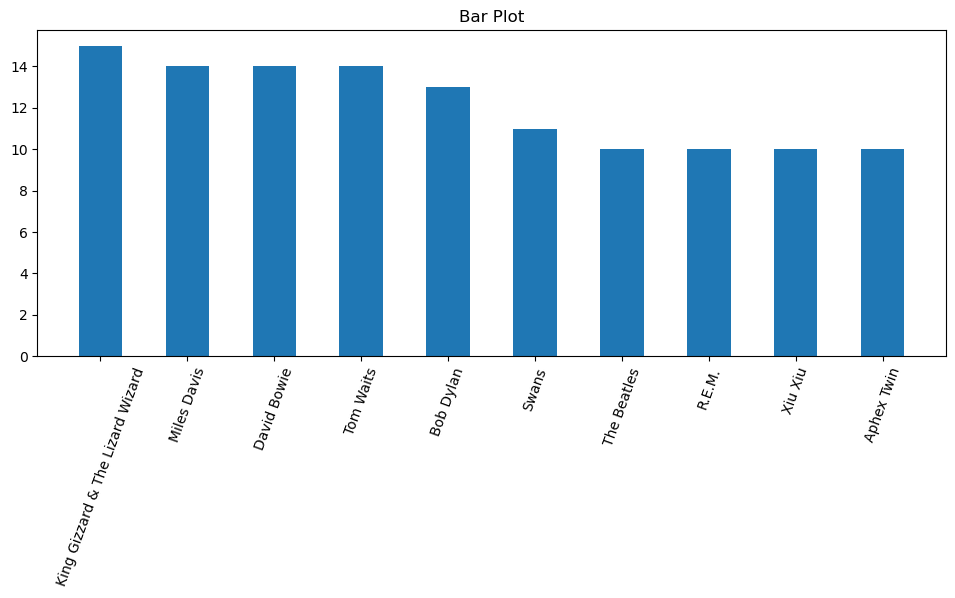

In [115]:
plt.figure(figsize = (10,4))
plt.bar(x = artist_count['artist'],height = artist_count['count'], width = 0.5)
plt.title('Bar Plot')
plt.tight_layout()
plt.xticks(rotation = 70)
plt.show()


Best Artist

In [116]:
best_artist = df.groupby(['artist'])['user_score'].mean().reset_index().sort_values(by = ['user_score'], ascending = False).head(10)

In [117]:
best_artist.head()


,artist,user_score
1243,Madvillain,93.0
1329,Mingus,92.0
964,Jeff Buckley,92.0
1140,Lauryn Hill,91.0
800,Godspeed You Black Emperor!,91.0


C:\Users\cathy\AppData\Local\Temp\ipykernel_31212\365891665.py:4: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cathy\AppData\Local\Temp\ipykernel_31212\365891665.py:4: UserWarning: Glyph 23713 (\N{CJK UNIFIED IDEOGRAPH-5CA1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cathy\AppData\Local\Temp\ipykernel_31212\365891665.py:4: UserWarning: Glyph 26179 (\N{CJK UNIFIED IDEOGRAPH-6643}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\cathy\anaconda3\envs\'musicenv'\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23665 (\N{CJK UNIFIED IDEOGRAPH-5C71}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cathy\anaconda3\envs\'musicenv'\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23713 (\N{CJK UNIFIED IDEOGRAPH-5CA1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\cath

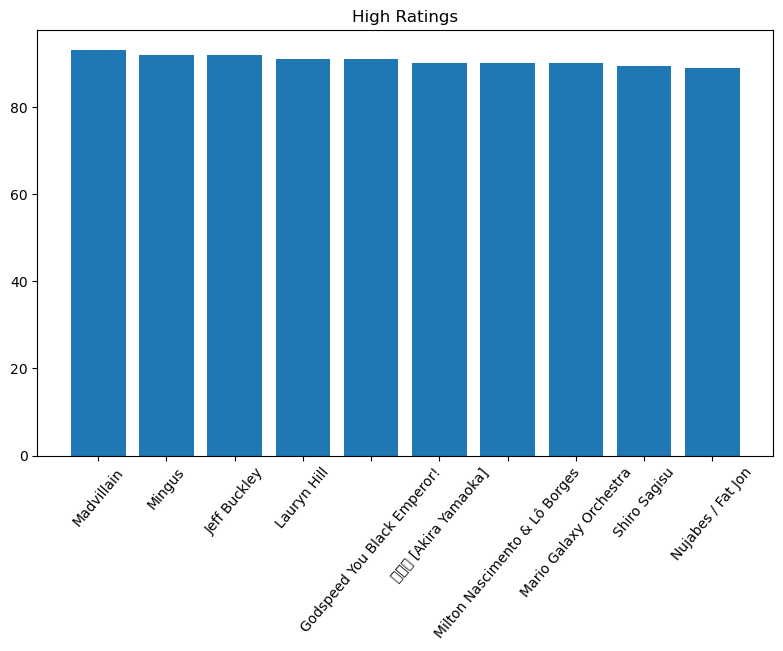

In [122]:
plt.figure(figsize = (8,5))
plt.bar(best_artist['artist'],best_artist['user_score'])
plt.title('High Ratings')
plt.tight_layout()
plt.xticks(rotation=50)
plt.show()